# Visual Computing in the Life Sciences

Assignment sheet 5

#### Group member: Dingming Liu, Faiza Khurshid, Danqi Wang

## Exercise 1 (Getting familiar with pandas, 25+2 Points)

# a)

In [2]:
import pandas as pd
import numpy
data = pd.read_excel('/Users/wangdanqi/Desktop/breast-cancer-wisconsin.xlsx')
data.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


# b)

(a) data.loc[:,’thickness’] (1P)     
Returns the column ‘thickness’ as a Series object.

(b) data.loc[:,[’thickness’, ’mitoses’]] (1P)    
Returns two columns (’thickness’ and ’mitoses’) as a DataFrame object.

(c) data.loc[2:5, :] (1P) 
Returns three rows starting from the 2nd up to the 5th row as a DataFrame object.

(d) data.loc[:,’class’]==2 (1P) 
Returns a Series object with a new column, which shows if a row belongs to the class “2” or not. In other words, return the cases with benign tumors.

(e) data.loc[data.loc[:,’class’]==2, [’thickness’, ’mitoses’]] (2P)    
Returns rows filtered by the class “2” as a DataFrame object with 2 columns - thickness and mitoses. In other
words, return thickness and mitoses for the cases with benign tumors.

(f) data.iloc[:, [0, -2, -1]] (1P)        
Returns a DataFrame object with 3 columns: first one, last one and the column before the last one (“code”, “mitoses” and “class”).

(g) data.iloc[:5,[0, -2, -1]] (1P)    
Returns first 5 rows of the DataFrame object with 3 columns: first one, last one and the column before the last one (“code”, “mitoses” and “class”).

(h) data[numpy.logical_and(data.thickness > 3, data.epiCelSize<7)] (2P)   
Returns only the rows where “thickness” column value > 3 and “epiCelSize” column value < 7.

(i) data.loc[:, [’mitoses’, ’thickness’]].iloc[:100, :] (2P)   
Returns first 100 rows with 2 columns - “mitoses” and “thickness” as a DataFrame object

# C)

Class is a reserved keyword in python.
data.bareNuc works because bareNuc is 
not a reserved keyword

# d) 

In [5]:
data.isnull().sum()

code            0
thickness       0
uniCelS         0
uniCelShape     0
marAdh          0
epiCelSize      0
bareNuc        16
blaChroma       0
normNuc         0
mitoses         0
class           0
dtype: int64

There are 16 missing values and only the column “bareNuc” contains missing values. 

# e)

In [6]:
data[data.isna().any(axis=1)]

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [7]:
# list of samples contain missing values
missing_values_list = data[data.isna().any(axis=1)].index.tolist()
missing_values_list

[23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]

# f)

“0” is the row-axis.

“1” is the column-axis

# g)

In [8]:
data.drop('code', axis=1, inplace=True, errors='ignore')
data.head()

,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


# h)

In [9]:
data_ = data.interpolate(method='nearest', axis=0)
data_.iloc[missing_values_list,:]

,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
23,8,4,5,1,2,1.0,7,3,1,4
40,6,6,6,9,6,7.0,7,8,1,2
139,1,1,1,1,1,1.0,2,1,1,2
145,1,1,3,1,2,1.0,2,1,1,2
158,1,1,2,1,3,1.0,1,1,1,2
164,5,1,1,1,2,3.0,3,1,1,2
235,3,1,4,1,2,1.0,3,1,1,2
249,3,1,1,1,2,1.0,3,1,1,2
275,3,1,3,1,2,1.0,2,1,1,2
292,8,8,8,1,2,1.0,6,10,1,4


# i)

In [10]:
inter_group = data_.groupby('class').mean()
final_data = inter_group.T
final_data

class,2,4
thickness,2.956332,7.195021
uniCelS,1.325328,6.572614
uniCelShape,1.443231,6.560166
marAdh,1.364629,5.547718
epiCelSize,2.120087,5.298755
bareNuc,1.401747,7.572614
blaChroma,2.100437,5.979253
normNuc,1.290393,5.863071
mitoses,1.063319,2.589212


## Exercise 2 (Producing a Scatterplot Matrix, 25 Points)

In this exercise you will visualize and interpret the data from the previous exercise. preprocess it to ﬁnd a subset of attributes that you can later visualize.

You will ﬁrst

The F score is one way to determine how well a given variable distinguishes between two groups. F is large if the diﬀerences of the two groups means ¯x 1 and ¯x 2 to the grand mean ¯x of all data points is large relative to the variances within the groups.

a) Compute F for each attribute with the benign and malignant classes as the two groups. You can use the function f_classif from sklearn.feature_selection. Identify the ﬁve attributes that best separate the two groups. Why does it not make sense to compute F for the “class” attribute itself? (3P)

In [30]:
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif

# create and fit to original dataset
selector = SelectKBest(f_classif, k=5)
feature = data_.iloc[:,:-1]
label = data_.iloc[:,-1]
selector.fit(feature, label)

# get columns with highest 5 F scores
cols = selector.get_support(indices=True)
for i in cols:
    print(feature.columns[i])

thickness
uniCelS
uniCelShape
bareNuc
blaChroma


#### Answer: F score is used to check how well each feature discriminates between two classes. Better feature is with further means and smaller variances within the groups.

b) Each diagonal cell should contain two overlaid histograms, one for the benign and one for the malignant class. In the histogram, variable values should be on the x axis, the frequency of observing that value in each class should be on the y axis. Use diﬀerent colors to distinguish between the classes, and add a legend. Your visual design should make it easy to answer the following questions (3P for implementation, 1P for justifying choice of colors):

• For which variable(s) can you ﬁnd a range of values for which the class of the sample is certain? Write down the ranges. (2P)

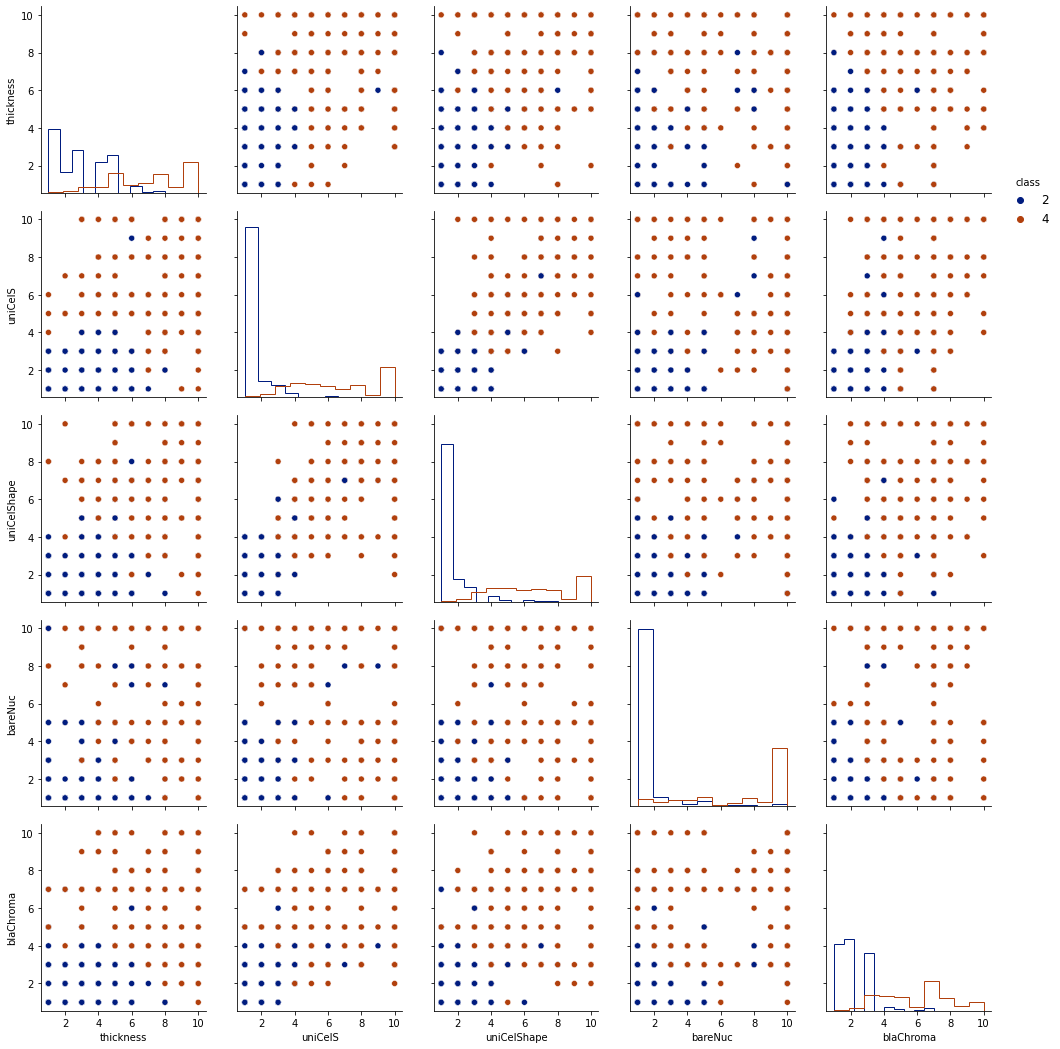

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot(new_data):
    g = sns.PairGrid(new_data, hue='class', palette='dark') # choose color 'dark', because it can distinguish the two classes well.
    g.map_diag(plt.hist, histtype="step" )# change type as step, to see the distribution clearly.
    g.map_offdiag(sns.scatterplot)
    g.add_legend(fontsize = 12, bbox_to_anchor=(1,0.8))
    g.fig.set_size_inches(15,15)
    
# new dataset with 5 features and class
new_data = pd.concat([feature.iloc[:,cols],label],axis=1)
plot(new_data)

#### • For which variable(s) can you ﬁnd a range of values for which the class of the sample is certain? Write down the ranges. (2P)

From the histogram, we can see two classes are more or less overlap in these variables.       
For thickness, class 4 is in range (3,4)and (8,10].class 1 is in range(0,2).      
For uniCelS, class 4 is in range (4,6) and (7,10].class 1 is in range(0,2).      
For uniCelShape, class 4 is in range(3,4),(5,6) and (8,10].class 1 is in range(0,2).     
For bareNuc, class 4 is in range(8,9).      
For biaChroma, class 4 is in range(3.5,4) and (7,10].class 1 is in range(0,1.8).

#### • Which variable(s) has(have) almost a uniform distribution for the malignant samples? (1P)

From the histograms, we can see variables'UniCelS' and 'uniCelShape' have almost uniform distribution.

c) Plots below the diagonal should contain regression lines for both classes but not the individual data points. seaborn.regplot makes it easy to ﬁt and plot a linear regression. (2P)

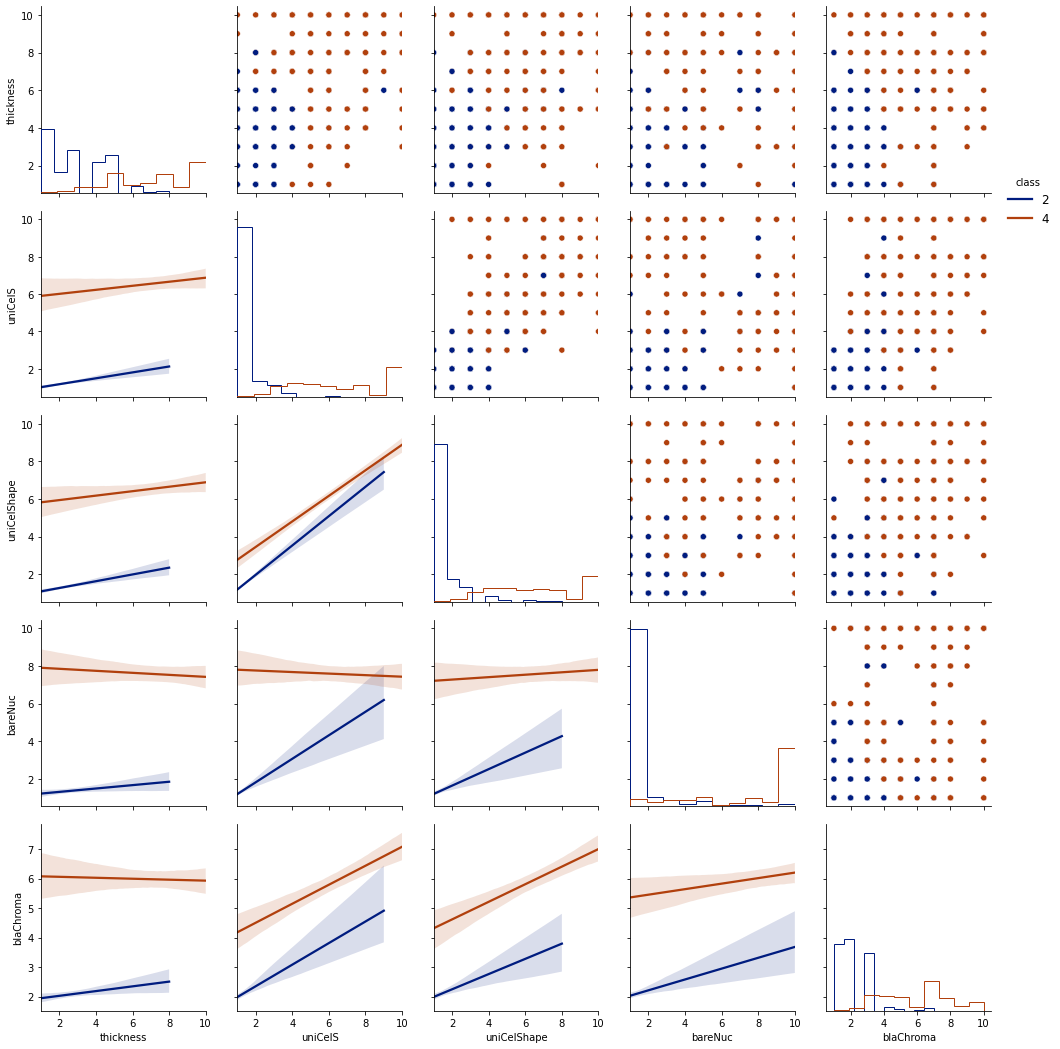

In [59]:
def plot_reg(new_data):
    '''modify lower offdiagnol part, use sns.regplot'''
    g = sns.PairGrid(new_data, hue='class', palette='dark') # choose color 'dark', because it can distinguish the two classes well.
    g.map_diag(plt.hist, histtype="step" )# change type as step, to see the distribution clearly.
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.regplot, scatter = False)
    g.add_legend(fontsize = 12, bbox_to_anchor=(1,0.8))
    g.fig.set_size_inches(15,15)
    
plot_reg(new_data)

d) Plots above the diagonal should visualizes the values of the corresponding pair of variables. Use diﬀerent colors and opacities so that it is simple to relate these scatter plots to the density plots on the diagonal. Write a custom plotting function to produce a scatter plot where the marker size reﬂects the number of overlapping points. (4P)

In [84]:
import itertools

def get_overlap_dict(data)-> dict:
    ''' 
    input: dataframe;
    output: create nested dictionary to store the frequency(count_number) 
    of two items among every two variables'''
    
    col = data.columns[:-1]
    num_dic = {}
    for elem in itertools.permutations(col,2): # select two feature names as key.
        
        # create new dataframe, use groupby to combine overlap items and size is corresponding count number.
        table = data.loc[:, elem].groupby(list(elem), as_index=False).size() 
        arr_list = []
        count_list = []
        for i in range(table.shape[0]):
            arr = table.iloc[i,:].values
            arr_list.append((arr[0],arr[1]))# put two items in tuple
            count_list.append(arr[2])
        num_dic[elem] = dict(zip(arr_list, count_list))# get final nested dictionary
        
    return num_dic

print(get_overlap_dict(new_data))

{('thickness', 'uniCelS'): {(1, 1): 131, (1, 2): 8, (1, 3): 3, (1, 4): 1, (1, 5): 1, (1, 6): 1, (2, 1): 41, (2, 2): 1, (2, 3): 5, (2, 5): 2, (2, 7): 1, (3, 1): 80, (3, 2): 10, (3, 3): 8, (3, 4): 3, (3, 5): 1, (3, 6): 2, (3, 7): 1, (3, 10): 3, (4, 1): 56, (4, 2): 7, (4, 3): 3, (4, 4): 3, (4, 5): 2, (4, 6): 2, (4, 7): 1, (4, 8): 4, (4, 10): 2, (5, 1): 63, (5, 2): 11, (5, 3): 17, (5, 4): 8, (5, 5): 4, (5, 6): 4, (5, 7): 5, (5, 8): 5, (5, 10): 13, (6, 1): 10, (6, 2): 2, (6, 3): 4, (6, 5): 2, (6, 6): 3, (6, 8): 3, (6, 9): 1, (6, 10): 9, (7, 1): 1, (7, 2): 2, (7, 3): 2, (7, 4): 4, (7, 5): 5, (7, 6): 4, (7, 8): 4, (7, 9): 1, (8, 2): 3, (8, 3): 4, (8, 4): 7, (8, 5): 2, (8, 6): 4, (8, 7): 7, (8, 8): 4, (8, 9): 1, (8, 10): 14, (9, 1): 1, (9, 4): 1, (9, 5): 3, (9, 6): 1, (9, 7): 1, (9, 8): 2, (9, 9): 1, (9, 10): 4, (10, 1): 1, (10, 2): 1, (10, 3): 6, (10, 4): 13, (10, 5): 8, (10, 6): 6, (10, 7): 3, (10, 8): 7, (10, 9): 2, (10, 10): 22}, ('thickness', 'uniCelShape'): {(1, 1): 121, (1, 2): 8, (1, 3

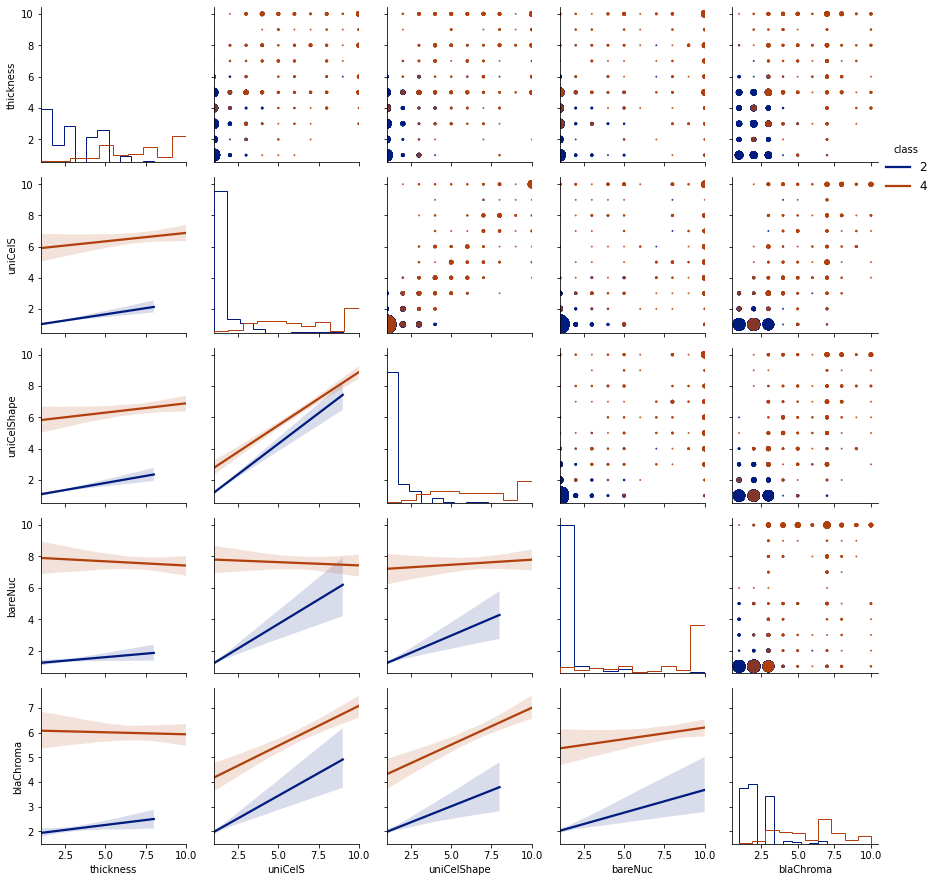

In [91]:
def scatter_marker(x, y, dic, **kwargs):
    ''' input: two column series, overlap dictionary,
        output: new_defined scatter plot
    '''
    marker_list = []
    col_tuple = (x.name, y.name)
    inner_dict = dic[col_tuple]
    for i, num_x in x.items():
        num_y = y[i]
        marker = inner_dict[(num_x, num_y)] # get count number in nested dictionary
        marker_list.append(marker) # get final marker list
        
    plt.scatter(x, y, s=marker_list, alpha=0.75, **kwargs) # set alpha refers to transparency

def show_plot(data):
    '''modify scatter plot -- upper area'''
    g = sns.PairGrid(new_data, hue ='class', palette='dark')
    g.map_diag(plt.hist, histtype ="step")
    g.map_upper(scatter_marker, dic = get_overlap_dict(data))# call function scatter_marker
    g.map_lower(sns.regplot, scatter = False)
    g.add_legend(fontsize = 12, bbox_to_anchor=(1,0.8))

show_plot(new_data)

• Point out a pair of variables whose values have a positive correlation overall. (1P)

#### Answer: From the scatterplot, UniCelShape and UniCelS has positive correlation.

• Can you identify a pair of variables for which the values are highly correlated in one group of subjects (e.g. malignant), but less so in the other group? (1P)

#### Answer: Based on the regression plot, for UniCels and bareNuc, they are highly correlated in class2, whereas have nearly no correlation in class4. And for uniCelShape and bareNuc, they are highly correlated in class2 as well, but have less correlation in class4.

e) Compute the distance consistency of all scatter plots. Which pair of variables leads to the highest distance consistency? (6P)

## Recap: Distance consistency (DSC)

– Defined as the percentage of all points that are closer to their own cluster center than to all others

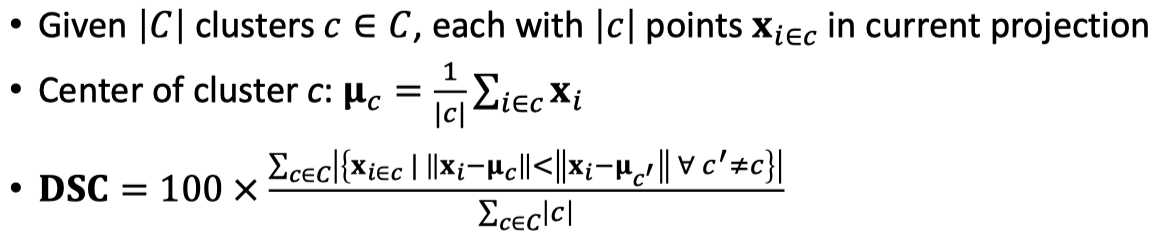

In [129]:
import numpy as np

num_point = new_data.shape[0]
DSC_list = []

for elem in itertools.combinations(new_data.columns[:-1], 2):
    two_column_class = pd.concat([new_data.loc[:, elem],new_data['class']], axis=1)
    
    # separate data into two clusters: class1-- 2
    class1 = two_column_class.loc[two_column_class['class'] == 2]
    array1 = class1.loc[:,elem].values  # convert to numpy
    mu1 = array1.mean(axis = 0)
    
    # class2 -- 4
    class2 = two_column_class.loc[two_column_class['class'] == 4]
    array2 = class2.loc[:,elem].values
    mu2 = array2.mean()
    
    # generate numerator of the formula
    count = 0
    for i in range(class1.shape[0]):
        dis_1 = np.linalg.norm(array1[i,:] - mu1)
        dis_2 = np.linalg.norm(array1[i,:] - mu2)
        if dis_1 < dis_2:
            count += 1

    for j in range(class2.shape[0]):
        dis_3 = np.linalg.norm(array2[j,:] - mu2)
        dis_4 = np.linalg.norm(array2[j,:] - mu1)
        if dis_3 < dis_4:
            count += 1
            
    # calculation        
    DSC = 100*count/num_point
    DSC_list.append((elem, DSC))
    print(f'The DSC of {elem} is {round(DSC,2)}%')

The DSC of ('thickness', 'uniCelS') is 93.71%
The DSC of ('thickness', 'uniCelShape') is 94.71%
The DSC of ('thickness', 'bareNuc') is 93.85%
The DSC of ('thickness', 'blaChroma') is 93.85%
The DSC of ('uniCelS', 'uniCelShape') is 93.42%
The DSC of ('uniCelS', 'bareNuc') is 94.13%
The DSC of ('uniCelS', 'blaChroma') is 92.99%
The DSC of ('uniCelShape', 'bareNuc') is 93.85%
The DSC of ('uniCelShape', 'blaChroma') is 93.28%
The DSC of ('bareNuc', 'blaChroma') is 92.42%


In [128]:
max_ = max(DSC_list, key = lambda x: x[1])
print(max_)      

(('thickness', 'uniCelShape'), 94.70672389127324)


#### Answer: Among them, we can conclude the DSC between 'thickness', 'uniCelShape' is highest(94.71%).

f) Imagine that, given only the values of two variables, you will be asked to decide whether they are from a benign sample, or a malignant one. Which pair of variables would you choose to make that decision? Why? (1P)

#### Answer: Based on the result above, 'thickness' and 'uniCelShape' will be chosen, since they have highest distance consistency, which means that their classes can be better separated.